<a href="https://colab.research.google.com/github/sem5ty/Project-3/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
import pandas as pd
data = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations: The dataframe has 1898 rows & 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Dataset has 1898 rows & 9 columns. Numerical data is stored as 'int64' or 'float64'. Categorical data is stored as 'object'.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: No null values present in dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
summary = data.describe()
print(summary)

min_preparation_time = data['food_preparation_time'].min()
avg_preparation_time = data['food_preparation_time'].mean()
max_preparation_time = data['food_preparation_time'].max()

print("Minimum preparation time in minutes is : ",min_preparation_time)
print("Average preparation time in minutes is : ",avg_preparation_time)
print("Maximum preparation time in minutes is : ",max_preparation_time)

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  
Minimum preparation time in minutes is :  20
Average preparation time in

#### Observations: The minimum time for food preparation in minutes is 20. The average time for food preparation in minutes is 27.37 & maximum time for food preparation in minutes is 35.


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
unrated_orders = data.isnull().sum()
print(unrated_orders)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: Here we can see that there are no null values in the row "Rating" hence there are no orders that have not been rated by the customer.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

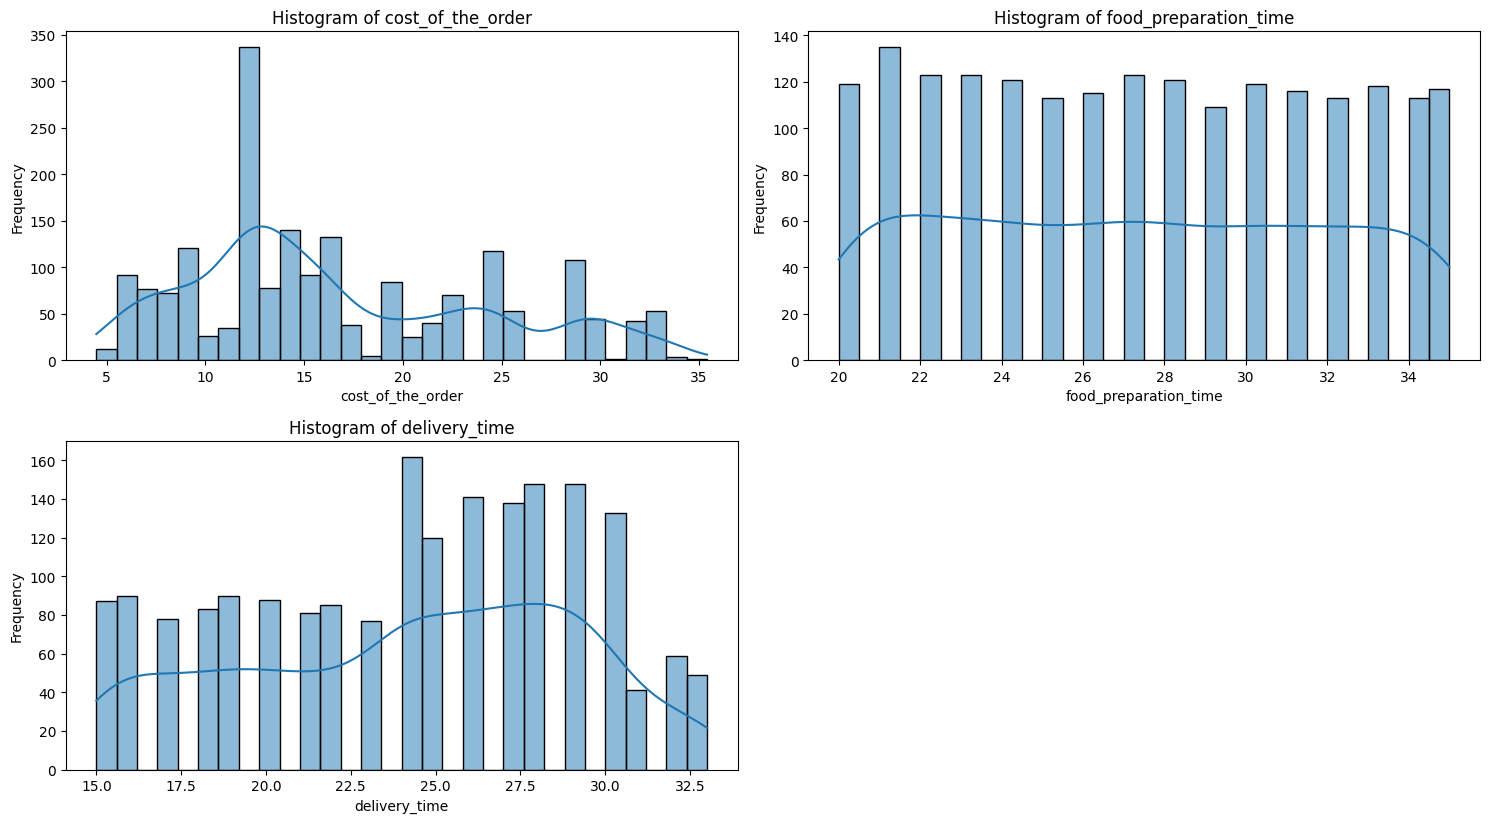

In [ ]:
# Write the code here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
# 1. Histograms for numerical columns
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

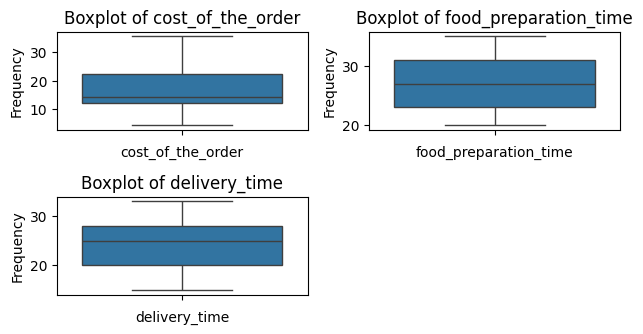

In [ ]:
# 2.Boxplot
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here

restaurant_order_count = data['restaurant_name'].value_counts()
top_5_restaurants = restaurant_order_count.head(5)
print("Top 5 restaurants by number of orders : ")
print(top_5_restaurants)

Top 5 restaurants by number of orders : 
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: Here we can see that the top 5 restaurants in terms of number of orders recieved are as follows :- 1.Shake Shack with 219 orders followed by 2.The Meatball Shop with 132 orders etc.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:

# Filter data for weekends (assuming Saturday and Sunday)
weekend_days = ['Saturday', 'Sunday']

# Filter data for weekends
weekend_data = data[data['day_of_the_week'].isin(weekend_days)]

# Check if weekend_data is empty
if weekend_data.empty:
    print("No data available for the specified weekend days.")
else:
    weekend_cuisine_counts = weekend_data['cuisine_type'].value_counts()

    # Get the most popular cuisine on weekends
    most_popular_cuisine = weekend_cuisine_counts.idxmax()
    most_popular_cuisine_count = weekend_cuisine_counts.max()

    print(f"The most popular cuisine on weekends is: {most_popular_cuisine} with {most_popular_cuisine_count} orders")


No data available for the specified weekend days.


#### Observations: Here we can see that there is no specific data available for the specified weekends i.e Saturday & Sunday. Hence we cannot determine the most popular cuisine on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
total_orders = len(data)

# Filter the orders that cost more than $20
orders_above_20 = data[data['cost_of_the_order'] > 20]

# Calculate the number of orders above $20
num_orders_above_20 = len(orders_above_20)

# Calculate the percentage of orders costing more than $20
percentage_above_20 = (num_orders_above_20 / total_orders) * 100

print("Total no of orders above $20 is : ",num_orders_above_20)
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

Total no of orders above $20 is :  555
Percentage of orders costing more than $20: 29.24%


#### Observations: So there are 555 orders that cost avove $20 in the dataset, hence the percentage of orders above $20 is 29.24%.


### **Question 10**: What is the mean order delivery time?

In [ ]:

# Calculate the mean order delivery time
mean_delivery_time = data['delivery_time'].mean()

print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations: The Mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Group by 'customer_id' and count the number of orders for each customer
customer_order_counts = data['customer_id'].value_counts()

# Get the top 3 customers
top_3_customers = customer_order_counts.head(3)

# Display the IDs of the top 3 customers and the number of orders they placed
print("Top 3 most frequent customers and their order counts:")
print(top_3_customers)

Top 3 most frequent customers and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


Here we see that the top three most frequent customers are found.
They have customer id's as 52832, 47440 & 83287 and the no of orders placed by them are 13 , 10 & 9 respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

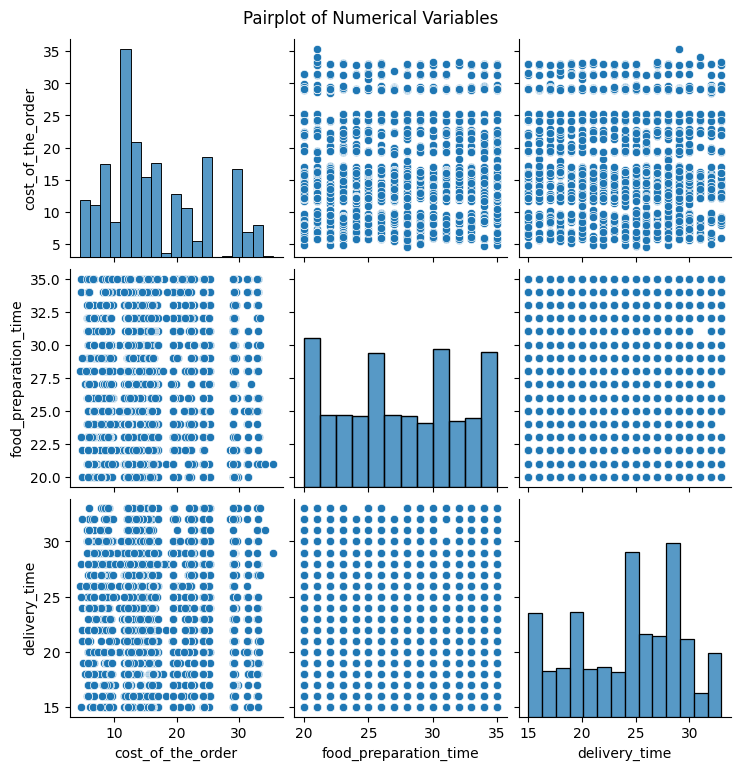

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pairpolt for numerical variables

sns.pairplot(data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

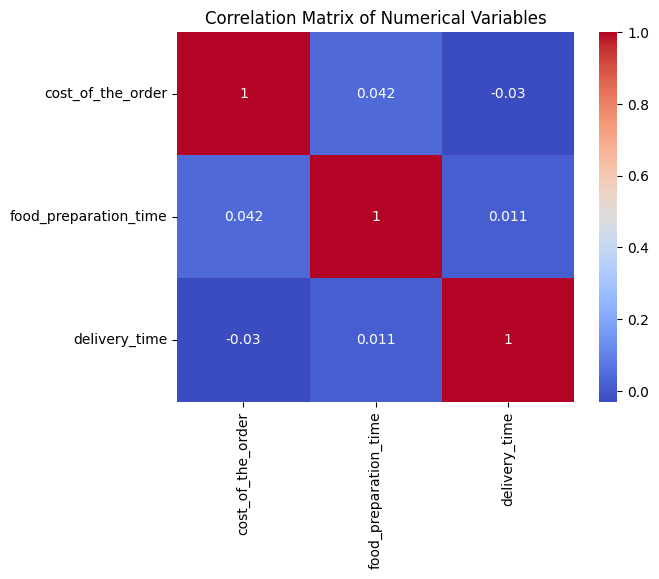

In [ ]:
# 2.Heatmap of correlation matrix for numerical variables

correlation_matrix = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

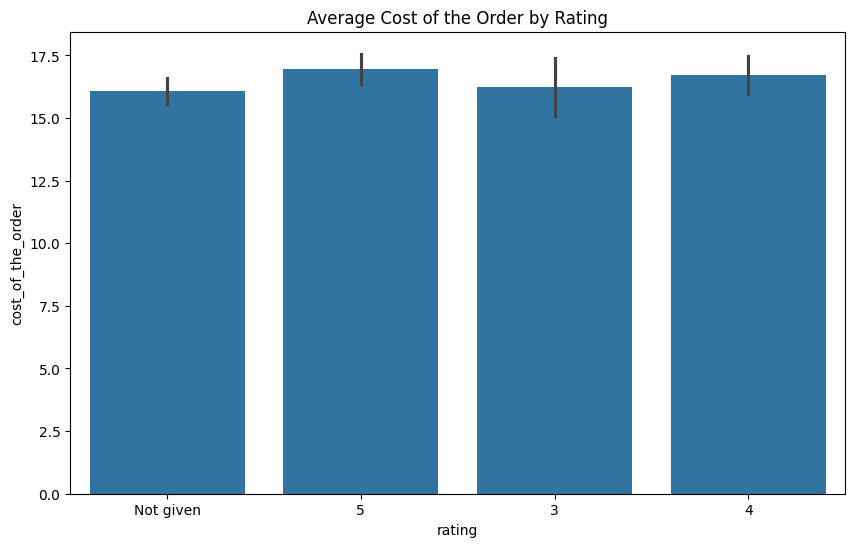

In [ ]:
# 3.Barplot of average cost_of_the_order by rating
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='cost_of_the_order', data=data, estimator=lambda x: pd.Series(x).mean())
plt.title('Average Cost of the Order by Rating')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Convert 'rating' to a numerical format as there are some non-numerical data values in it
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Group by 'restaurant_name' and calculate the rating count and average rating for each restaurant
restaurant_ratings = data.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants with more than 50 ratings and an average rating greater than 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations: Here we can see that the restaurants eligible for the promotional offer are displayed that satisfy the condition of having Rating Count > 50 & Average Rating > 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Define the commission rates
high_cost_threshold = 20
medium_cost_threshold = 5
high_cost_rate = 0.25   # Charge is 25% on order above $20
medium_cost_rate = 0.15 # Charge is 15% on order above $5.

# Calculating the revenue from high-cost orders (> $20)
high_cost_orders = data[data['cost_of_the_order'] > high_cost_threshold]
revenue_generated_from_high_cost_orders = high_cost_orders['cost_of_the_order'].sum() * high_cost_rate

# Calculate the revenue from medium-cost orders (> $5 and <= $20)
medium_cost_orders = data[(data['cost_of_the_order'] > medium_cost_threshold) &
                          (data['cost_of_the_order'] <= high_cost_threshold)]
revenue_generated_from_medium_cost_orders = medium_cost_orders['cost_of_the_order'].sum() * medium_cost_rate

# Printing the revenue generated from high-cost orders
print(f"Revenue generated from high-cost orders is : ${revenue_generated_from_high_cost_orders:.2f}")

# Printing the revenue generated by medium-cost orders\
print(f"Revenue generated from medium-cost orders is : ${revenue_generated_from_medium_cost_orders:.2f}")

# Calculate the total revenue
total_revenue = revenue_generated_from_high_cost_orders + revenue_generated_from_medium_cost_orders

# Display the total revenue
print(f"The total net revenue generated by the company is: ${total_revenue:.2f}")

Revenue generated from high-cost orders is : $3688.73
Revenue generated from medium-cost orders is : $2477.58
The total net revenue generated by the company is: $6166.30


#### Observations:
We first calculate the revenue generated by high cost orders
which is $3688.73

Next we calculate revenue genrated by medium cost orders i.e >$5 and <$20 which is $2477.58.

Hence the total revenue generated is $6166.30






### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Calculate the total time required for each order (preparation + delivery)
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

# Calculate the number of orders that take more than 60 minutes
orders_above_60_minutes = data[data['total_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = data.shape[0]

# Calculate the percentage of orders taking more than 60 minutes
percentage_above_60_minutes = (orders_above_60_minutes / total_orders) * 100

# Printing the total number of orders
print(f"Total number of orders: {total_orders}")

# Printing the number of orders that take more than 60 minutes
print(f"Number of orders taking more than 60 minutes: {orders_above_60_minutes}")

# Printing the percentage of orders taking more than 60 minutes
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60_minutes:.2f}%")

Total number of orders: 1898
Number of orders taking more than 60 minutes: 200
Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
We find the total number of orders that is **1898**, then find the total no of orders taking more than 60 minutes which is **200** and finally finding the percentage of orders taking more than 60 minutes which is **10.54%**.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Define the weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Convert 'delivery_time' to numeric, removing any non-numerical data
data['delivery_time'] = pd.to_numeric(data['delivery_time'], errors='coerce')

# Display the number of NaN values in 'delivery_time' after conversion
print("Number of NaN values in 'delivery_time':", data['delivery_time'].isna().sum())

# Drop rows with NaN values in 'delivery_time' and count remaining rows
data_cleaned = data.dropna(subset=['delivery_time'])
print("Number of valid entries in 'delivery_time' after dropping NaNs:", data_cleaned.shape[0])

# Verify data after dropping NaN values
print("Number of valid 'delivery_time' entries after dropping NaNs:", data_cleaned.shape[0])
print("Sample cleaned data:")
print(data_cleaned.head())

# Filter the data for weekdays and weekends
weekday_orders = data[data['day_of_the_week'].isin(weekdays)]
weekend_orders = data[data['day_of_the_week'].isin(weekends)]

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_weekday = weekday_orders['delivery_time'].mean()
mean_delivery_weekend = weekend_orders['delivery_time'].mean()

print(f"Mean delivery time on weekdays: {mean_delivery_weekday:.2f} minutes")
print(f"Mean delivery time on weekends: {mean_delivery_weekend:.2f} minutes")

Number of NaN values in 'delivery_time': 0
Number of valid entries in 'delivery_time' after dropping NaNs: 1898
Number of valid 'delivery_time' entries after dropping NaNs: 1898
Sample cleaned data:
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend     NaN                     25   
1              12.08         Weekend     NaN                     25   
2              12.23         Weekday     5.0                     23   
3              29.20         Weekend     3.0                     25   
4              11.59         Weekday 

#### Observations:
I have tried to find the number of non-numerical data values in delivery_time which is found to be 0 and the no of valid entries is 1898 but I am still getting the mean time as nan minutes which suggests that the data in delivery_time is missing or not in the expected format.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:  
**Order Patterns and Customer Preferences -** Certain restaurants and cuisine types are more popular, particularly on weekends. Identifying these can help tailor marketing strategies to peak times and popular offerings.

**Customer Segmentation -** A small number of customers account for a large number of orders. These frequent customers are valuable and may benefit from targeted loyalty programs.

### Recommendations:
**Loyalty and Incentive Programs -** Develop a loyalty program targeting frequent customers, offering exclusive discounts, early access to new offerings, or other benefits to encourage repeat business.

**Menu and Pricing Strategy -**  Encourage higher-order values by introducing premium menu items, meal bundles, or limited-time offers that encourage customers to spend more.

---